U01

Aufgabe 2

n:  [         2          4          8         16         32         64
        128        256        512       1024       2048       4096
       8192      16384      32768      65536     131072     262144
     524288    1048576    2097152    4194304    8388608   16777216
   33554432   67108864  134217728  268435456  536870912 1073741824]
Vorwärts Summe:  [1.25       1.42361111 1.52742205 1.58434653 1.61416726 1.6294305
 1.637152   1.64103544 1.64298285 1.64395798 1.6444459  1.64468996
 1.644812   1.64487303 1.64490355 1.64491881 1.64492644 1.64493025
 1.64493216 1.64493311 1.64493359 1.64493383 1.64493395 1.64493401
 1.64493404 1.64493405 1.64493406 1.64493406 1.64493406 1.64493406]
Rückwährts Summe:  [1.25       1.42361111 1.52742205 1.58434653 1.61416726 1.6294305
 1.637152   1.64103544 1.64298285 1.64395798 1.6444459  1.64468996
 1.644812   1.64487303 1.64490355 1.64491881 1.64492644 1.64493025
 1.64493216 1.64493311 1.64493359 1.64493383 1.64493395 1.64493401
 1.64493404 1.64493405

[Text(0.5, 0, 'n')]

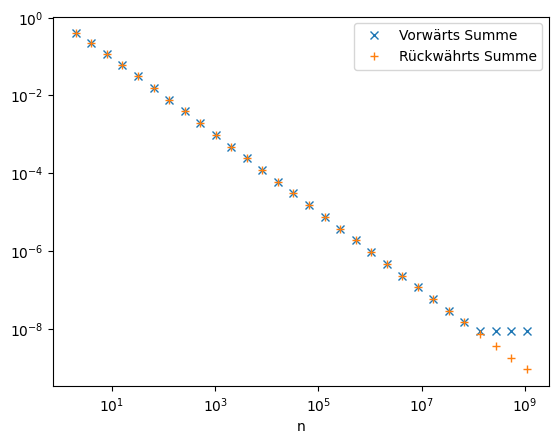

In [14]:
import numpy as np
import matplotlib.pyplot as plt

j_range = np.arange(30) + 1
n_range = 2 ** j_range


def s(n):
    ret = 0
    for k in (np.arange(n) + 1):
        ret += 1 / k ** 2
    return ret


def s_rev(n):
    ret = 0
    for k in (n - np.arange(n)):
        ret += 1 / k ** 2
    return ret


s_vec = np.vectorize(s)
s_rev_vec = np.vectorize(s_rev)

s_ret = s_vec(n_range)
s_rev_ret = s_rev_vec(n_range)
print('n: ', n_range)
print('Vorwärts Summe: ', s_ret)
print('Rückwährts Summe: ', s_rev_ret)

deviation = abs(s_ret - np.pi ** 2 /6)
deviation_rev = abs(s_rev_ret - np.pi ** 2 / 6)

fig, ax = plt.subplots()

ax.loglog(n_range, deviation, 'x', label='Vorwärts Summe')
ax.loglog(n_range, deviation_rev, '+', label='Rückwährts Summe')
ax.legend()
ax.set(xlabel='n')

# fig.savefig('U01_2.pdf')

Für sehr große $n$ werden sehr kleine Summanten von dem Fehler der Summe "geschluckt" und tragen sommit, wie bei der Vorwärts Summe zu beobachten, nicht mehr zur Berechnung des Ergebnis bei.

Wenn man die sehr kleinen Summanten addiert bevor die Summe sehr groß wird können sie weiterhin zur Berechnung des Ergebnis beitragen.

Aufgabe 3

a)
def. $g(x)=(x, x^2)$

beh. $x^{(n)}=g(a^nc)$

IA: $x^{(0)}=g(a^0 c)=(c, c^2)$

IS: $x^{(n+1)}=f(x^{(n)})$ mit IV: $x^{(n)}=g(a^nc)$

$\Rightarrow x^{(n+1)}=f(g(a^nc))=(a\cdot a^nc, -(b-a^2) (a^nc)^2 + b (a^nc)^2) = (a^{n+1}c, a^2 (a^nc)^2 + b (a^nc)^2 - b (a^nc)^2) = (a^{n+1}c, (a^{n+1}c)^2) = g(a^{n+1}c)$

Somit gilt mit $x^{(n)}=g(a^nx)$ die Darstellung $x^{(n)}=(a^nc, (a^nc)^2)$

$\lim_{n\rightarrow \infty}||x^{(n)}||_2 = \lim_{n\rightarrow \infty}\sqrt{(a^nc)^2 + (a^nc)^4}$, $a$ und $c$ konstant und $0<a<1$, 

$\Rightarrow a^n c\rightarrow 0 $ für $n\rightarrow \infty$

$\Rightarrow \lim_{n\rightarrow \infty}||x^{(n)}||_2 = \sqrt{(0)^2 + (0)^4} = 0$. 


b)

[Text(0.5, 0, 'n')]

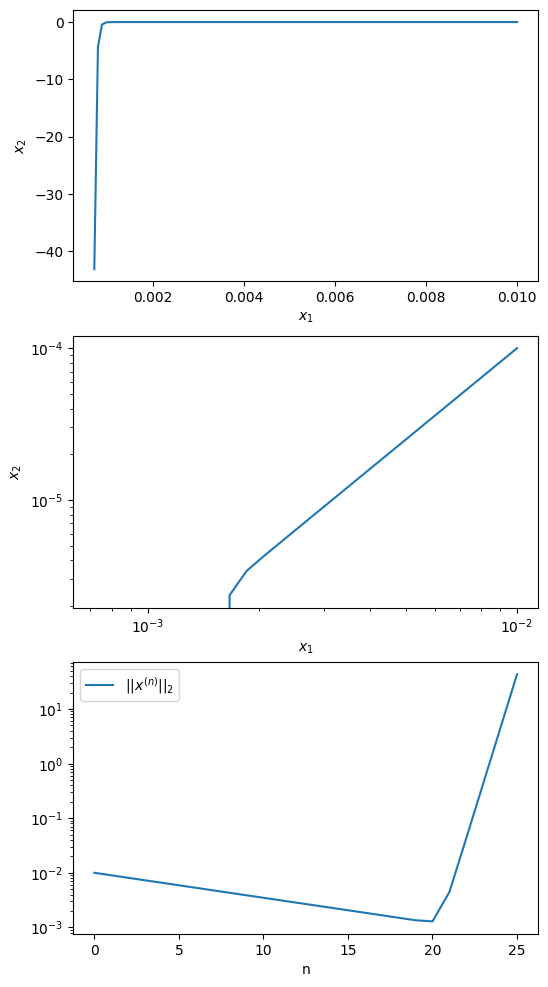

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2, a: float, b: float):
    ret1 = a * x1
    ret2 = -(b - a ** 2) * x1 ** 2 + b * x2
    return [ret1, ret2]


nrange = np.arange(26)
coor1_list = []
coor2_list = []
c = 1 / 100
x1_n = c
x2_n = c ** 2
for _ in nrange:
    coor1_list.append(x1_n)
    coor2_list.append(x2_n)
    x1_n, x2_n = f(x1_n, x2_n, a=9 / 10, b=10)

norm_list = np.linalg.norm([coor1_list, coor2_list], axis=0)

fig, axes = plt.subplots(3,1, figsize=(6,12))
axes = axes.flatten()
axes[0].plot(coor1_list, coor2_list)
axes[0].set(xlabel='$x_1$', ylabel='$x_2$')
axes[1].loglog(coor1_list, coor2_list)
axes[1].set(xlabel='$x_1$', ylabel='$x_2$')
axes[2].semilogy(nrange, norm_list, label='$||x^{(n)}||_2$')
axes[2].legend()
axes[2].set(xlabel='n')

# fig.savefig('U01_3.pdf')

Für $n=20$ wird $x_2$ negativ und divergiert während die $x_1$-Werte weiterhin gegen 0 konvergieren.

Dies entspricht nicht der in a) berechneten Konvergenz gegen 0.